In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os
from sklearn.preprocessing import LabelEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Set data sets path here
data_path = ['data']

# Import the data using the file path
dataset = ['Animated-TV-Shows-Final.csv']
data = os.sep.join(data_path + dataset)

# Import data
df = pd.read_csv(data)

df.head()

,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Top Genres,Total Occ
0,tt2861424,Rick and Morty,9.2,2013,,TV-14,23,"[' Adventure', ' Comedy']",2.0
1,tt13616990,Chainsaw Man,9.1,2022,,TV-MA,NaN,"[' Action', ' Adventure']",0.0
2,tt12590266,Cyberpunk: Edgerunners,8.4,2022,,TV-MA,24,"[' Action', ' Adventure']",0.0
3,tt14986406,Bleach: Thousand-Year Blood War,9.6,2022,,TV-MA,24,"[' Action', ' Adventure']",0.0
4,tt0096697,The Simpsons,8.7,1989,,TV-14,22,[' Comedy'],5.0


In [3]:
df['Total Occ'] = df['Total Occ'].fillna(0)
df['Top Genres'] = df['Top Genres'].str.replace(r"\[","", regex=True)
df['Top Genres'] = df['Top Genres'].str.replace(r"\]","", regex=True)
df['Start Year'] = df['Start Year'].str.replace(r"[^0-9]","", regex=True)
df['Start Year'] = df['Start Year'].fillna("0")
df['End Year'] = df['End Year'].fillna("0")
df['Episode Run Time (min)'] = df['Episode Run Time (min)'].str.replace(r"[^0-9]","", regex=True)
df['Episode Run Time (min)'] = df['Episode Run Time (min)'].fillna(0)
df['TV Rating'] = df['TV Rating'].astype('str')

df.head()

,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Top Genres,Total Occ
0,tt2861424,Rick and Morty,9.2,2013,,TV-14,23,"' Adventure', ' Comedy'",2.0
1,tt13616990,Chainsaw Man,9.1,2022,,TV-MA,0,"' Action', ' Adventure'",0.0
2,tt12590266,Cyberpunk: Edgerunners,8.4,2022,,TV-MA,24,"' Action', ' Adventure'",0.0
3,tt14986406,Bleach: Thousand-Year Blood War,9.6,2022,,TV-MA,24,"' Action', ' Adventure'",0.0
4,tt0096697,The Simpsons,8.7,1989,,TV-14,22,' Comedy',5.0


In [4]:
df[['Top Genre', 'Secondary Genre']] = df['Top Genres'].str.split(',', expand=True)

del df['Top Genres']

df.head()

,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Total Occ,Top Genre,Secondary Genre
0,tt2861424,Rick and Morty,9.2,2013,,TV-14,23,2.0,' Adventure',' Comedy'
1,tt13616990,Chainsaw Man,9.1,2022,,TV-MA,0,0.0,' Action',' Adventure'
2,tt12590266,Cyberpunk: Edgerunners,8.4,2022,,TV-MA,24,0.0,' Action',' Adventure'
3,tt14986406,Bleach: Thousand-Year Blood War,9.6,2022,,TV-MA,24,0.0,' Action',' Adventure'
4,tt0096697,The Simpsons,8.7,1989,,TV-14,22,5.0,' Comedy',None


Text(0.5, 0.98, 'Categorical Plotting - IMDB Rating')

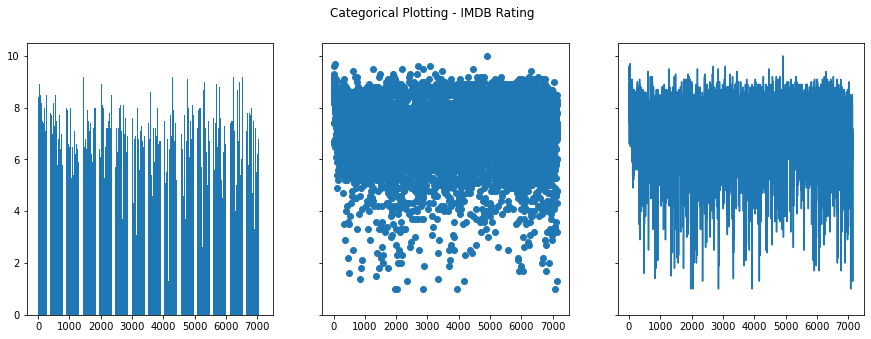

In [5]:
dictionary = df['IMDB Rating'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - IMDB Rating')

Text(0.5, 0.98, 'Categorical Plotting - Start Year')

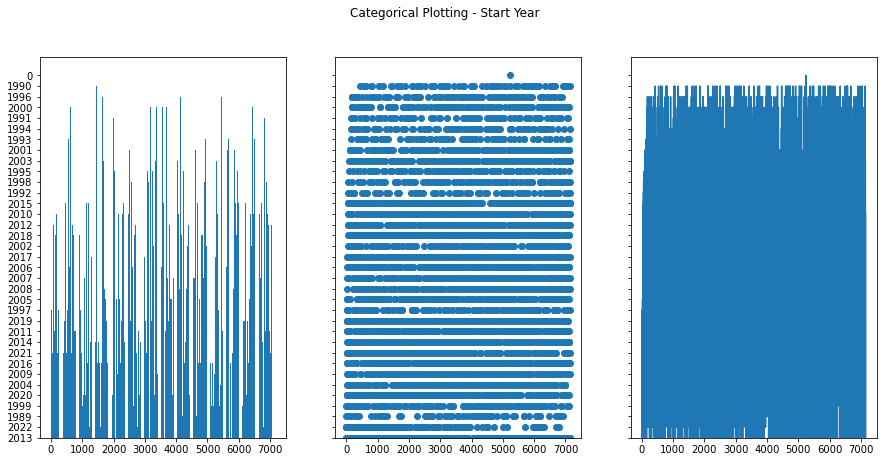

In [6]:
dictionary = df['Start Year'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 7), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - Start Year')

Text(0.5, 0.98, 'Categorical Plotting - End Year')

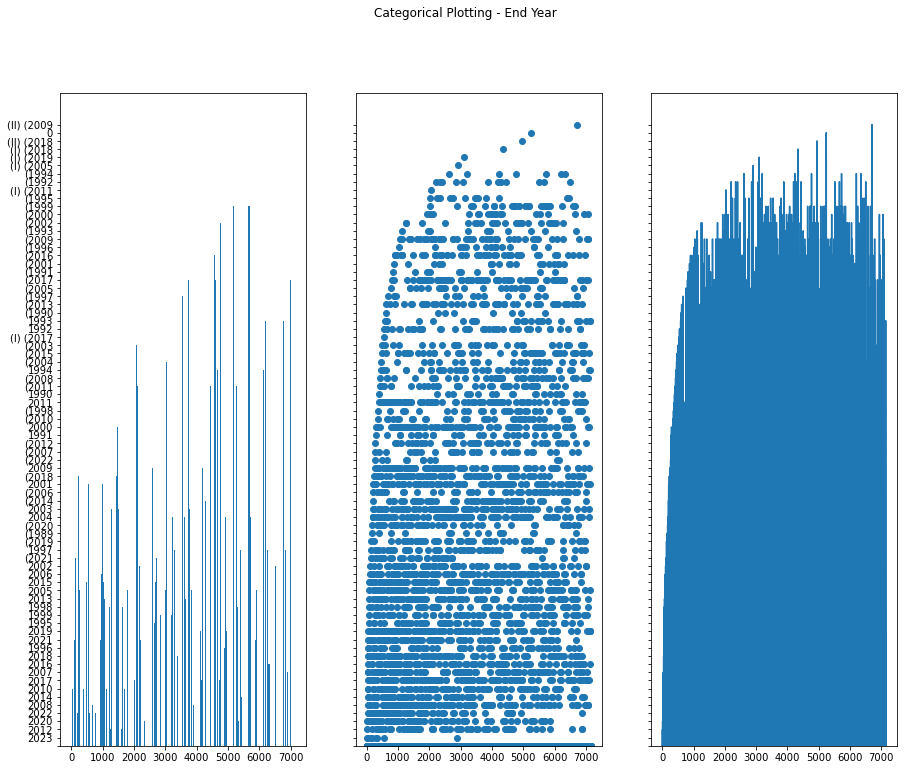

In [9]:
dictionary = df['End Year'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 12), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - End Year')

Text(0.5, 0.98, 'Categorical Plotting - TV Rating')

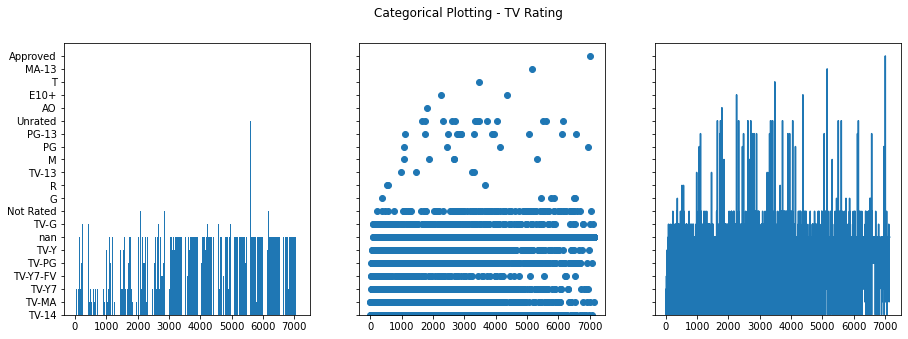

In [8]:
dictionary = df['TV Rating'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - TV Rating')

Text(0.5, 0.98, 'Categorical Plotting - Episode Run Time (min)')

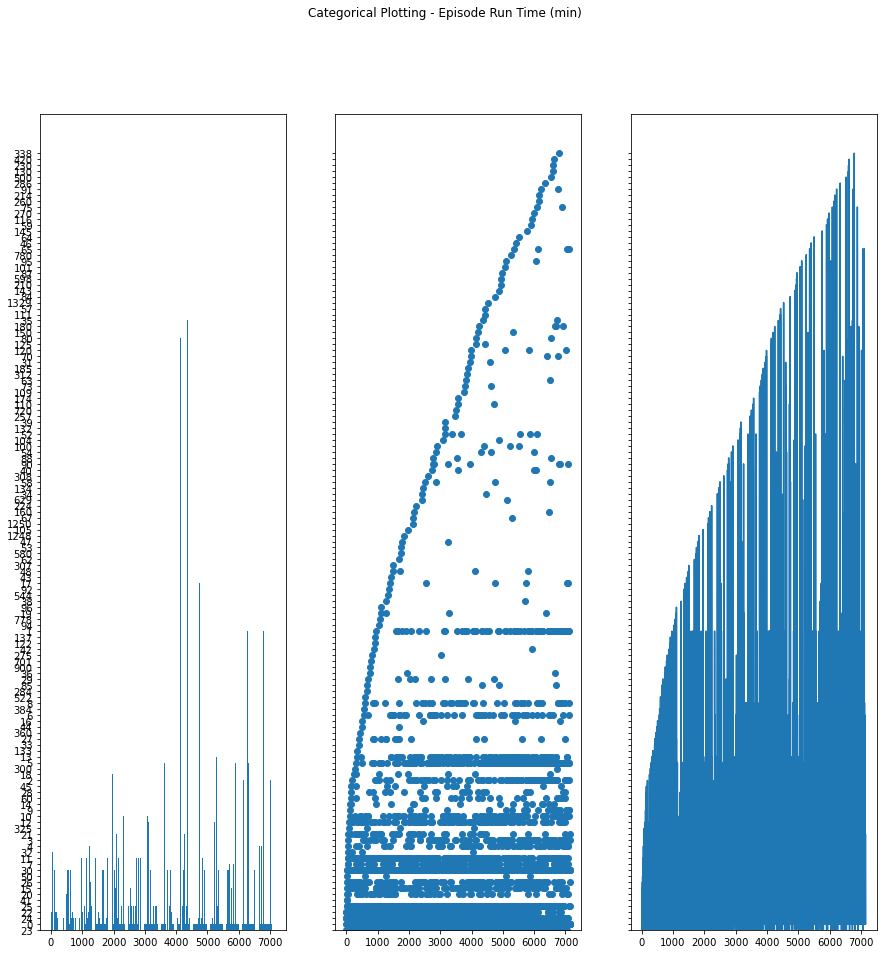

In [19]:
df['Episode Run Time (min)'] = df['Episode Run Time (min)'].astype('str')
dictionary = df['Episode Run Time (min)'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - Episode Run Time (min)')

Text(0.5, 0.98, 'Categorical Plotting - Total Occ')

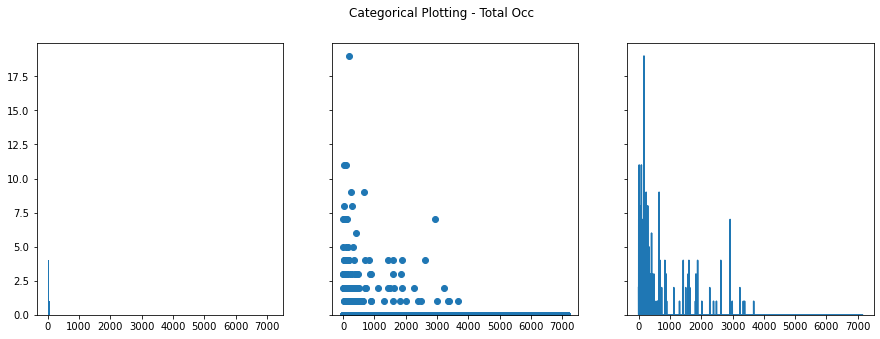

In [13]:
dictionary = df['Total Occ'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - Total Occ')

Text(0.5, 0.98, 'Categorical Plotting - Top Genre')

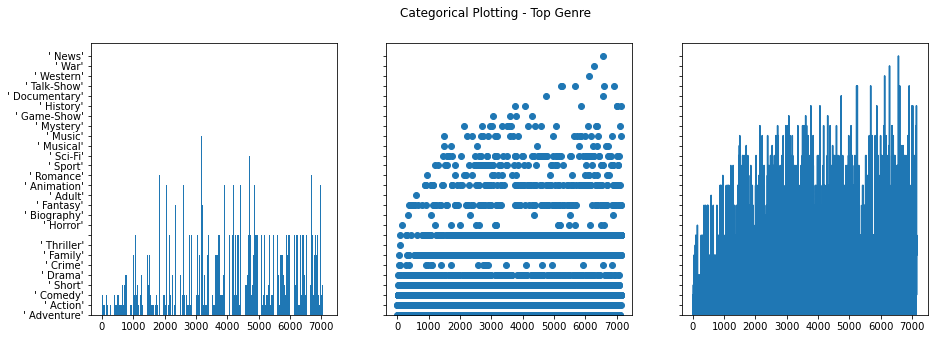

In [14]:
dictionary = df['Top Genre'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - Top Genre')

Text(0.5, 0.98, 'Categorical Plotting - Secondary Genre')

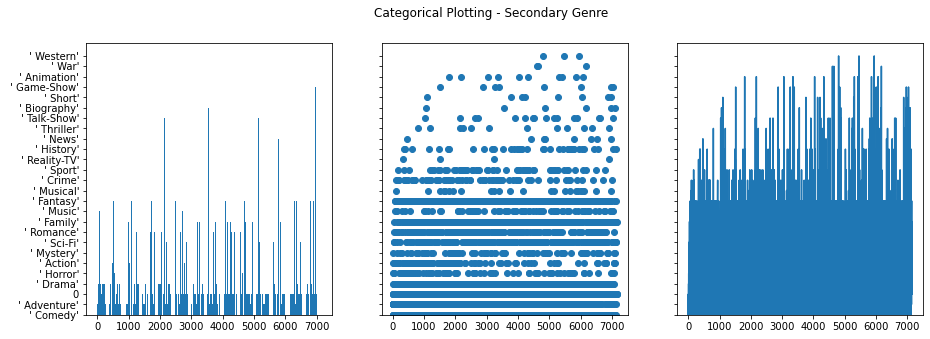

In [30]:
df['Secondary Genre'] = df['Secondary Genre'].fillna(value=np.nan)
df['Secondary Genre'] = df['Secondary Genre'].fillna("0")

dictionary = df['Secondary Genre'].to_dict()
names = list(dictionary.keys())
values = list(dictionary.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting - Secondary Genre')